# **Análisis de las tendencias de emisiones de CO2 por sector en Latinomamerica antes y despues de implementar políticas de mitigación entre el 2000 y 2023.**

El enfoque estará en:

- Identificar los países más emisores.
- Observar cambios a lo largo del tiempo.
- Comparar niveles de emisiones antes y después de políticas climáticas clave.
- Producir visualizaciones que faciliten la comprensión de estos datos.

In [1]:
## Instalar e Importar librerias
import sys
print(sys.executable)
!pip install xlrd
!pip install openpyxl
!pip install pandas
!pip install matplotlib seaborn
import xlrd
print(xlrd.__version__)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\RAC-BELLABFES\AppData\Local\Programs\Python\Python313\python.exe



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


2.0.1



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# **Lectura datasets**

In [2]:
# Emisiones anuales CO por Región
anual_co_emissions_region = pd.read_csv("C:/Users/RAC-BELLABFES/Documents/Repositorio copia local/Proyecto_final_analisis_datos/annual-co-emissions-by-region.csv")
# Emisiones por sector
bysector = pd.read_csv("C:/Users/RAC-BELLABFES/Documents/Repositorio copia local/Proyecto_final_analisis_datos/co-emissions-by-sector.csv")
# OWID - Emisiones globales
greenhouse = pd.read_csv("C:/Users/RAC-BELLABFES/Documents/Repositorio copia local/Proyecto_final_analisis_datos/greenhouse-gas-emissions.csv")

In [3]:
anual_co_emissions_region = anual_co_emissions_region.drop(columns=['Annual CO₂ emissions.1'])
# Eliminamos valores nulos
anual_co_emissions_region = anual_co_emissions_region.dropna(subset=['Annual CO₂ emissions'])
# Revisar datos
anual_co_emissions_region = anual_co_emissions_region.dropna(subset=['Year'])
anual_co_emissions_region['Year'] = anual_co_emissions_region['Year'].astype(int)

In [4]:
# Eliminar nulos
greenhouse = greenhouse.dropna(subset=['Annual greenhouse gas emissions in CO₂ equivalents'])

In [5]:
# Filtrar para quedarnos nuevos dataframes solo con datos desde el año 2000
anual_co = anual_co_emissions_region[anual_co_emissions_region['Year'] >= 2000]
bysector_ = bysector[bysector['Year'] >= 2000]
greenhouse_ = greenhouse[greenhouse['Year'] >= 2000]
# Verificación
print("Años en anual co emissiones region:",anual_co_emissions_region['Year'].min(), "-", anual_co_emissions_region['Year'].max())
print("Años en bysector:", bysector['Year'].min(), "-", bysector['Year'].max())
print("Años en greenhouse:", greenhouse['Year'].min(), "-", greenhouse['Year'].max())

Años en anual co emissiones region: 1750 - 2023
Años en bysector: 1990 - 2021
Años en greenhouse: 1850 - 2023


In [21]:
anual_co.info()

<class 'pandas.core.frame.DataFrame'>
Index: 288 entries, 116 to 2267
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entity                288 non-null    object 
 1   Code                  72 non-null     object 
 2   Year                  288 non-null    int64  
 3   Annual CO₂ emissions  288 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 11.2+ KB


In [6]:
# Ver caracteristicas principales
print(anual_co.shape)
print(anual_co.columns)
anual_co_paises = anual_co['Entity'].unique()
print(f"Total países/regiones en anual_co_: {len(anual_co_paises)}")
print(anual_co_paises)
anual_co.head()

(288, 4)
Index(['Entity', 'Code', 'Year', 'Annual CO₂ emissions'], dtype='object')
Total países/regiones en anual_co_: 12
['Africa' 'Asia (excl. China and India)' 'China' 'Europe (excl. EU-27)'
 'European Union (27)' 'India' 'International aviation'
 'International shipping' 'North America (excl. USA)' 'Oceania'
 'South America' 'United States']


,Entity,Code,Year,Annual CO₂ emissions
116,Africa,NaN,2000,9.308508e+08
117,Africa,NaN,2001,9.206018e+08
118,Africa,NaN,2002,8.999958e+08
119,Africa,NaN,2003,9.896446e+08
120,Africa,NaN,2004,1.045726e+09


In [22]:
bysector_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4510 entries, 10 to 6559
Data columns (total 12 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Entity                                                        4510 non-null   object 
 1   Code                                                          4268 non-null   object 
 2   Year                                                          4510 non-null   int64  
 3   Carbon dioxide emissions from buildings                       4449 non-null   float64
 4   Carbon dioxide emissions from industry                        4391 non-null   float64
 5   Carbon dioxide emissions from land use change and forestry    4510 non-null   float64
 6   Carbon dioxide emissions from other fuel combustion           4449 non-null   float64
 7   Carbon dioxide emissions from transport                       4449 non-nu

In [8]:
print(bysector_.shape)
print(bysector_.columns)
bysector_paises = bysector_['Entity'].unique()
print(f'Total países/regiones en bysector_: {len(bysector_)}')
print(bysector_paises)
bysector_.head()

(4510, 12)
Index(['Entity', 'Code', 'Year', 'Carbon dioxide emissions from buildings',
       'Carbon dioxide emissions from industry',
       'Carbon dioxide emissions from land use change and forestry',
       'Carbon dioxide emissions from other fuel combustion',
       'Carbon dioxide emissions from transport',
       'Carbon dioxide emissions from manufacturing and construction',
       'Fugitive emissions of carbon dioxide from energy production',
       'Carbon dioxide emissions from electricity and heat',
       'Carbon dioxide emissions from bunker fuels'],
      dtype='object')
Total países/regiones en bysector_: 4510
['Afghanistan' 'Africa' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Asia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'Cambodia' 'Cameroon

,Entity,Code,Year,Carbon dioxide emissions from buildings,Carbon dioxide emissions from industry,Carbon dioxide emissions from land use change and forestry,Carbon dioxide emissions from other fuel combustion,Carbon dioxide emissions from transport,Carbon dioxide emissions from manufacturing and construction,Fugitive emissions of carbon dioxide from energy production,Carbon dioxide emissions from electricity and heat,Carbon dioxide emissions from bunker fuels
10,Afghanistan,AFG,2000,160000.0,10000.0,-2390000.0,0.0,510000.0,230000.0,NaN,160000.00,20000.0
11,Afghanistan,AFG,2001,170000.0,10000.0,120000.0,0.0,510000.0,230000.0,NaN,180000.00,20000.0
12,Afghanistan,AFG,2002,170000.0,10000.0,120000.0,0.0,510000.0,560000.0,NaN,150000.00,20000.0
13,Afghanistan,AFG,2003,180000.0,10000.0,120000.0,0.0,720000.0,490000.0,NaN,259999.98,30000.0
14,Afghanistan,AFG,2004,200000.0,10000.0,120000.0,0.0,600000.0,240000.0,NaN,230000.00,30000.0


In [23]:
greenhouse_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4296 entries, 150 to 37409
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Entity                                              4296 non-null   object 
 1   Year                                                4296 non-null   int64  
 2   Annual greenhouse gas emissions in CO₂ equivalents  4296 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 134.2+ KB


In [24]:
print(greenhouse_.shape)
print(greenhouse_.columns)
greenhouse_paises = greenhouse_['Entity'].unique()
print(f"Total países/regiones en greenhouse_: {len(greenhouse_paises)}")
print(greenhouse_paises)
greenhouse_.head()

(4296, 3)
Index(['Entity', 'Year', 'Annual greenhouse gas emissions in CO₂ equivalents'], dtype='object')
Total países/regiones en greenhouse_: 179
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras'
 'Hong Kong' 'Hungary' 'Icelan

,Entity,Year,Annual greenhouse gas emissions in CO₂ equivalents
150,Afghanistan,2000,16954712.0
151,Afghanistan,2001,15772437.0
152,Afghanistan,2002,20735294.0
153,Afghanistan,2003,21422782.0
154,Afghanistan,2004,20056680.0


In [25]:
!pip install pycountry
import pycountry

# Crear una lista de nombres de países reales reconocidos por pycountry
paises_reales = [country.name for country in pycountry.countries]

# En algunos casos pycountry tiene nombres diferentes (por ejemplo, "Côte d'Ivoire" vs "Ivory Coast")
# Podemos complementar con algunos nombres adicionales manualmente si es necesario
extras = ['Czechia', 'Democratic Republic of Congo', 'Micronesia (country)', 'North Macedonia']
paises_reales += extras

# Filtrar el DataFrame para conservar solo países reales
greenhouse_ = greenhouse_[greenhouse_['Entity'].isin(paises_reales)]


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
import pycountry

# Crear una lista de nombres de países reales reconocidos por pycountry
paises_reales = [country.name for country in pycountry.countries]

# En algunos casos pycountry tiene nombres diferentes (por ejemplo, "Côte d'Ivoire" vs "Ivory Coast")
# Podemos complementar con algunos nombres adicionales manualmente si es necesario
extras = ['Czechia', 'Democratic Republic of Congo', 'Micronesia (country)', 'North Macedonia']
paises_reales += extras

# Filtrar el DataFrame para conservar solo países reales
greenhouse_ = greenhouse_[greenhouse_['Entity'].isin(paises_reales)]

C:\Users\RAC-BELLABFES\AppData\Local\Temp\ipykernel_24148\1487319720.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_greenhouse.index, x=top_greenhouse.values, palette="Blues_r")


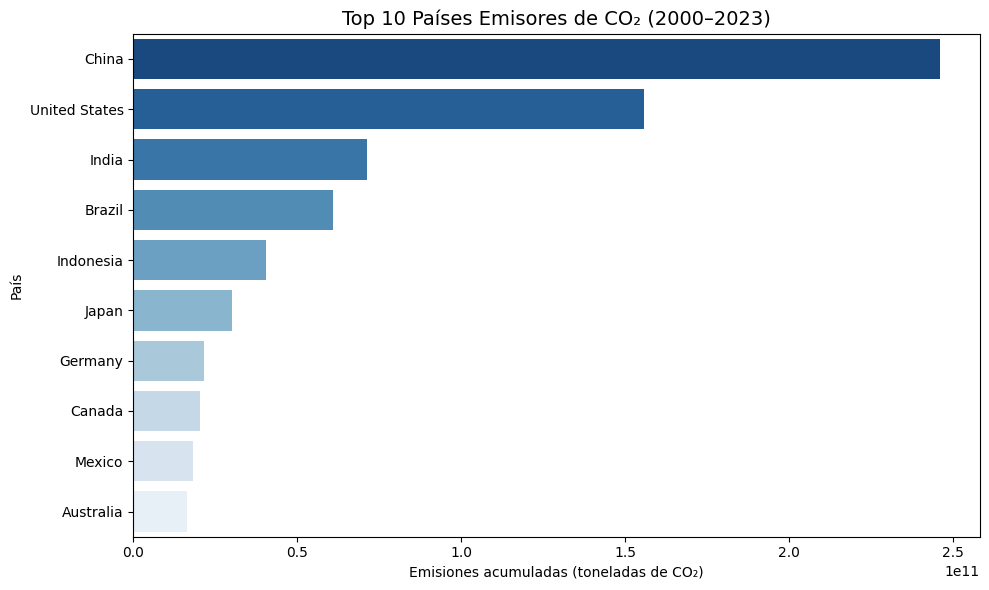

In [27]:
top_greenhouse = (
    greenhouse_.groupby('Entity')['Annual greenhouse gas emissions in CO₂ equivalents']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Gráfico utilizando el índice y los valores de la Serie top_greeenhouse
plt.figure(figsize=(10, 6))
sns.barplot(y=top_greenhouse.index, x=top_greenhouse.values, palette="Blues_r")
plt.title('Top 10 Países Emisores de CO₂ (2000–2023)', fontsize=14)
plt.xlabel('Emisiones acumuladas (toneladas de CO₂)')
plt.ylabel('País')
plt.tight_layout()
plt.show()

C:\Users\RAC-BELLABFES\AppData\Local\Temp\ipykernel_24148\4102738236.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_10_latin_america.index, x=top_10_latin_america.values, palette="Blues_r")


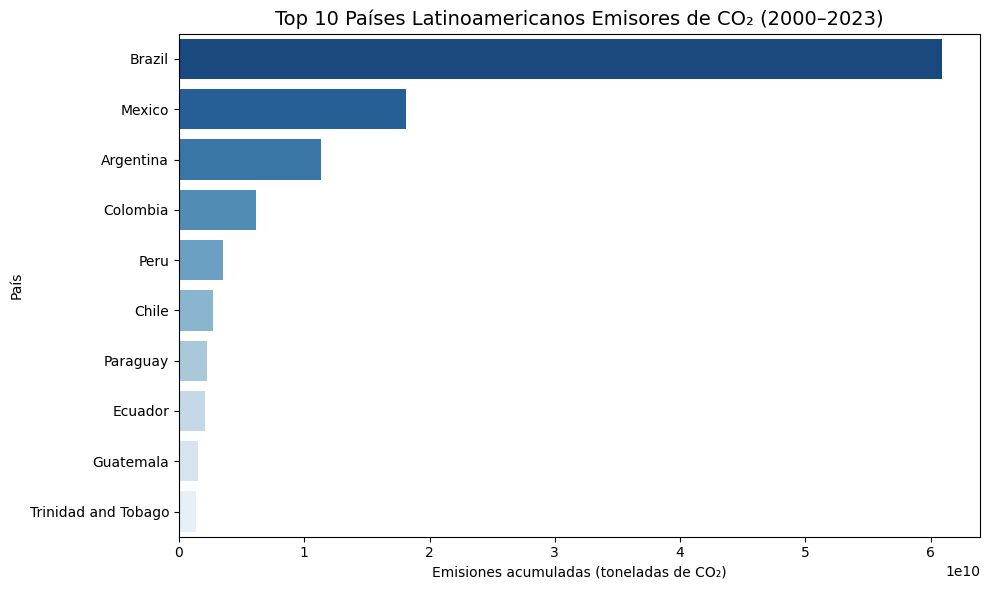

In [28]:
# Lista de países latinoamericanos (en inglés, para que coincida con tu DataFrame)
latin_america_countries = [
    'Argentina', 'Belize', 'Bolivia', 'Brazil', 'Chile', 'Colombia',
    'Costa Rica', 'Cuba', 'Dominica', 'Ecuador', 'El Salvador', 'Grenada',
    'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Jamaica', 'Mexico',
    'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Dominican Republic',
    'Saint Kitts and Nevis', 'Saint Vincent and the Grenadines', 'Saint Lucia',
    'Suriname', 'Trinidad and Tobago', 'Uruguay', 'Venezuela',
    'Antigua and Barbuda', 'Bahamas', 'Barbados'
]

# Agrupa, suma y ordena como antes
top_greenhouse_all = (
    greenhouse_.groupby('Entity')['Annual greenhouse gas emissions in CO₂ equivalents']
    .sum()
    .sort_values(ascending=False)
)

# Filtra para obtener solo los países latinoamericanos que están en el top
top_greenhouse_latin_america = top_greenhouse_all[top_greenhouse_all.index.isin(latin_america_countries)]

# Toma los 10 principales si hay suficientes países latinoamericanos
top_10_latin_america = top_greenhouse_latin_america.head(10)

# Gráfico utilizando el índice y los valores de la Serie filtrada
plt.figure(figsize=(10, 6))
sns.barplot(y=top_10_latin_america.index, x=top_10_latin_america.values, palette="Blues_r")
plt.title('Top 10 Países Latinoamericanos Emisores de CO₂ (2000–2023)', fontsize=14)
plt.xlabel('Emisiones acumuladas (toneladas de CO₂)')
plt.ylabel('País')
plt.tight_layout()
plt.show()

C:\Users\RAC-BELLABFES\AppData\Local\Temp\ipykernel_24148\3634545246.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_10_latin_america.index, x=top_10_latin_america.values, palette="Blues_r")


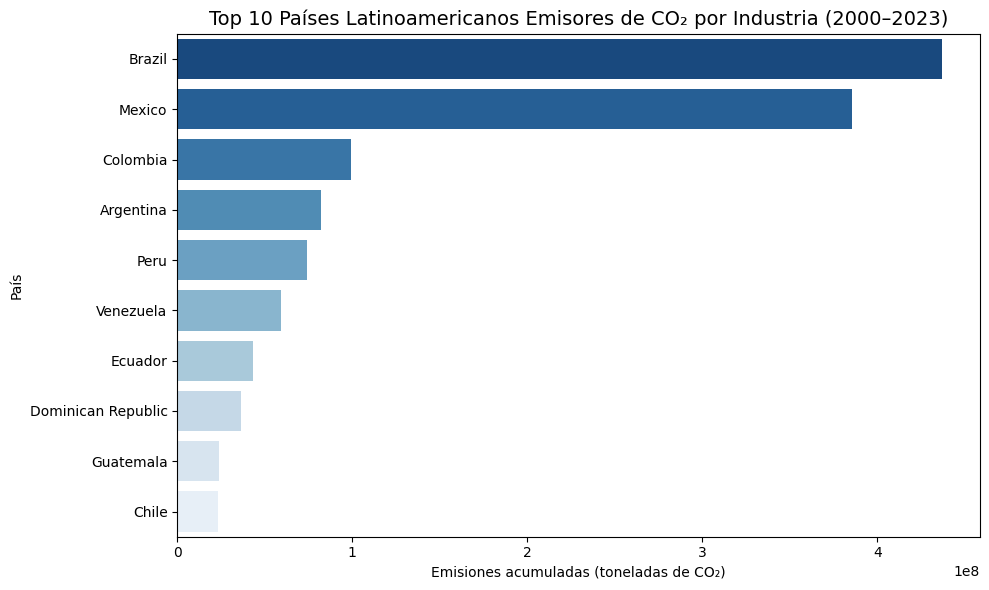

In [29]:
# Lista de países latinoamericanos (en inglés, para que coincida con tu DataFrame)
latin_america_countries = [
    'Argentina', 'Belize', 'Bolivia', 'Brazil', 'Chile', 'Colombia',
    'Costa Rica', 'Cuba', 'Dominica', 'Ecuador', 'El Salvador', 'Grenada',
    'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Jamaica', 'Mexico',
    'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Dominican Republic',
    'Saint Kitts and Nevis', 'Saint Vincent and the Grenadines', 'Saint Lucia',
    'Suriname', 'Trinidad and Tobago', 'Uruguay', 'Venezuela',
    'Antigua and Barbuda', 'Bahamas', 'Barbados'
]

# Agrupa, suma y ordena como antes
top_bysector_all = (
    bysector_.groupby('Entity')['Carbon dioxide emissions from industry']
    .sum()
    .sort_values(ascending=False)
)

# Filtra para obtener solo los países latinoamericanos que están en el top
top_bysector_latin_america = top_bysector_all[top_bysector_all.index.isin(latin_america_countries)]

# Toma los 10 principales si hay suficientes países latinoamericanos
top_10_latin_america = top_bysector_latin_america.head(10)

# Gráfico utilizando el índice y los valores de la Serie filtrada
plt.figure(figsize=(10, 6))
sns.barplot(y=top_10_latin_america.index, x=top_10_latin_america.values, palette="Blues_r")
plt.title('Top 10 Países Latinoamericanos Emisores de CO₂ por Industria (2000–2023)', fontsize=14)
plt.xlabel('Emisiones acumuladas (toneladas de CO₂)')
plt.ylabel('País')
plt.tight_layout()
plt.show()

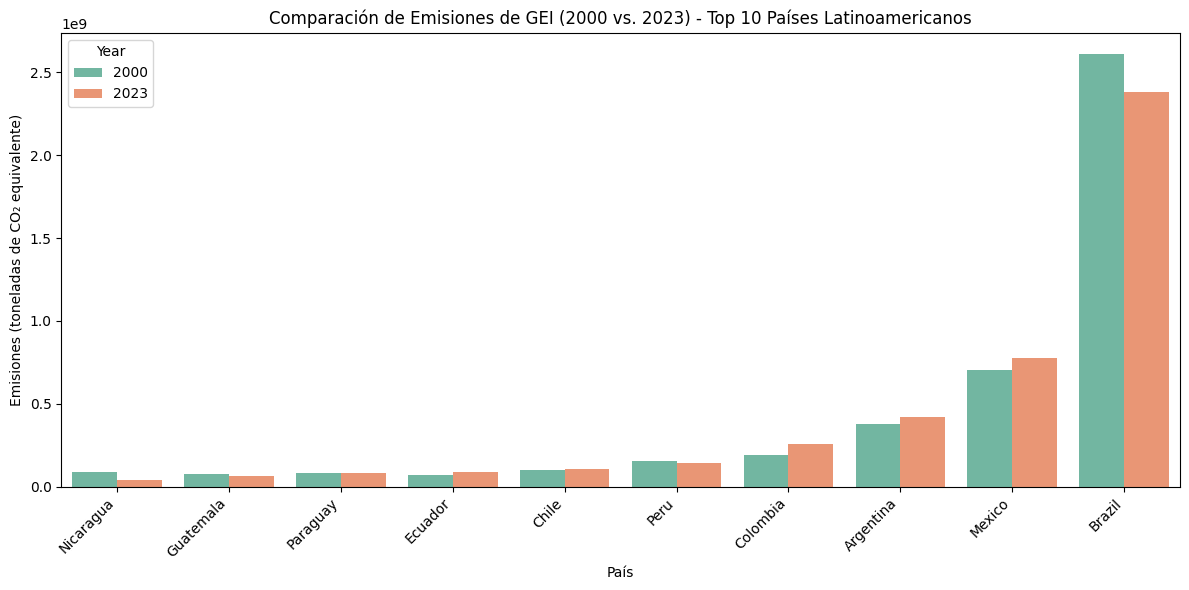

In [17]:
# Lista de países latinoamericanos (en inglés, para que coincida con tu DataFrame)
latin_america_countries = [
    'Argentina', 'Belize', 'Bolivia', 'Brazil', 'Chile', 'Colombia',
    'Costa Rica', 'Cuba', 'Dominica', 'Ecuador', 'El Salvador', 'Grenada',
    'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Jamaica', 'Mexico',
    'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Dominican Republic',
    'Saint Kitts and Nevis', 'Saint Vincent and the Grenadines', 'Saint Lucia',
    'Suriname', 'Trinidad and Tobago', 'Uruguay', 'Venezuela',
    'Antigua and Barbuda', 'Bahamas', 'Barbados'
]

# Filtrar el DataFrame para los años 2000 y 2023 y los países latinoamericanos
emisiones_2000_2023_la = greenhouse_[
    (greenhouse_['Year'].isin([2000, 2023])) & (greenhouse_['Entity'].isin(latin_america_countries))
]

# Agrupar por país y sumar las emisiones para obtener el total en el periodo
total_emisiones_la = emisiones_2000_2023_la.groupby('Entity')['Annual greenhouse gas emissions in CO₂ equivalents'].sum()

# Seleccionar los 10 principales países latinoamericanos según sus emisiones totales
top_10_la = total_emisiones_la.nlargest(10).index.tolist()

# Filtrar nuevamente el DataFrame para incluir solo los 10 principales y los años 2000 y 2023
top_10_emisiones_2000_2023 = emisiones_2000_2023_la[
    emisiones_2000_2023_la['Entity'].isin(top_10_la)
]

# Pivotear los datos para tener las emisiones de 2023 en una columna para ordenar
emisiones_pivot_sort = top_10_emisiones_2000_2023.pivot_table(
    index='Entity', columns='Year', values='Annual greenhouse gas emissions in CO₂ equivalents'
).reset_index()

# Ordenar el DataFrame por las emisiones del año 2023 de forma ascendente
comparacion_ordenada = pd.melt(
    emisiones_pivot_sort.sort_values(by=2023, ascending=True),
    id_vars='Entity',
    value_vars=[2000, 2023],
    var_name='Year',
    value_name='Annual greenhouse gas emissions in CO₂ equivalents'
)

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
sns.barplot(
    data=comparacion_ordenada,
    x='Entity',
    y='Annual greenhouse gas emissions in CO₂ equivalents',
    hue='Year',
    palette='Set2'
)
plt.title('Comparación de Emisiones de GEI (2000 vs. 2023) - Top 10 Países Latinoamericanos')
plt.ylabel('Emisiones (toneladas de CO₂ equivalente)')
plt.xlabel('País')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [30]:
# Proceso para top_greenhouse (Mundial)
top_greenhouse_serie = (
    greenhouse_.groupby('Entity')['Annual greenhouse gas emissions in CO₂ equivalents']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
df_top_greenhouse = top_greenhouse_serie.reset_index(name='Emisiones')
df_top_greenhouse['Grupo'] = 'Mundial'
df_top_greenhouse.rename(columns={'Entity': 'Pais'}, inplace=True)

print("Top 10 Mundial:")
print(df_top_greenhouse)
print("\n")

Top 10 Mundial:
            Pais     Emisiones    Grupo
0          China  2.458213e+11  Mundial
1  United States  1.556160e+11  Mundial
2          India  7.128095e+10  Mundial
3         Brazil  6.088864e+10  Mundial
4      Indonesia  4.052046e+10  Mundial
5          Japan  2.995999e+10  Mundial
6        Germany  2.159759e+10  Mundial
7         Canada  2.043195e+10  Mundial
8         Mexico  1.815049e+10  Mundial
9      Australia  1.651498e+10  Mundial




In [31]:
greenhouse_latin_america = greenhouse_[greenhouse_['Entity'].isin(latin_america_countries)]

top_latin_america_serie = (
    greenhouse_latin_america.groupby('Entity')['Annual greenhouse gas emissions in CO₂ equivalents']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
df_top_latin_america = top_latin_america_serie.reset_index(name='Emisiones')
df_top_latin_america['Grupo'] = 'Latinoamérica'
df_top_latin_america.rename(columns={'Entity': 'Pais'}, inplace=True)

print("Top 10 Latinoamérica:")
print(df_top_latin_america)
print("\n")

Top 10 Latinoamérica:
                  Pais     Emisiones          Grupo
0               Brazil  6.088864e+10  Latinoamérica
1               Mexico  1.815049e+10  Latinoamérica
2            Argentina  1.130047e+10  Latinoamérica
3             Colombia  6.125964e+09  Latinoamérica
4                 Peru  3.528148e+09  Latinoamérica
5                Chile  2.733848e+09  Latinoamérica
6             Paraguay  2.272412e+09  Latinoamérica
7              Ecuador  2.076343e+09  Latinoamérica
8            Guatemala  1.536533e+09  Latinoamérica
9  Trinidad and Tobago  1.376442e+09  Latinoamérica




DataFrame de Comparación (ordenado para el gráfico):
                   Pais     Emisiones          Grupo
10                China  2.458213e+11        Mundial
11        United States  1.556160e+11        Mundial
12                India  7.128095e+10        Mundial
0                Brazil  6.088864e+10  Latinoamérica
13               Brazil  6.088864e+10        Mundial
14            Indonesia  4.052046e+10        Mundial
15                Japan  2.995999e+10        Mundial
16              Germany  2.159759e+10        Mundial
17               Canada  2.043195e+10        Mundial
18               Mexico  1.815049e+10        Mundial
1                Mexico  1.815049e+10  Latinoamérica
19            Australia  1.651498e+10        Mundial
2             Argentina  1.130047e+10  Latinoamérica
3              Colombia  6.125964e+09  Latinoamérica
4                  Peru  3.528148e+09  Latinoamérica
5                 Chile  2.733848e+09  Latinoamérica
6              Paraguay  2.272412e+09  Latinoa

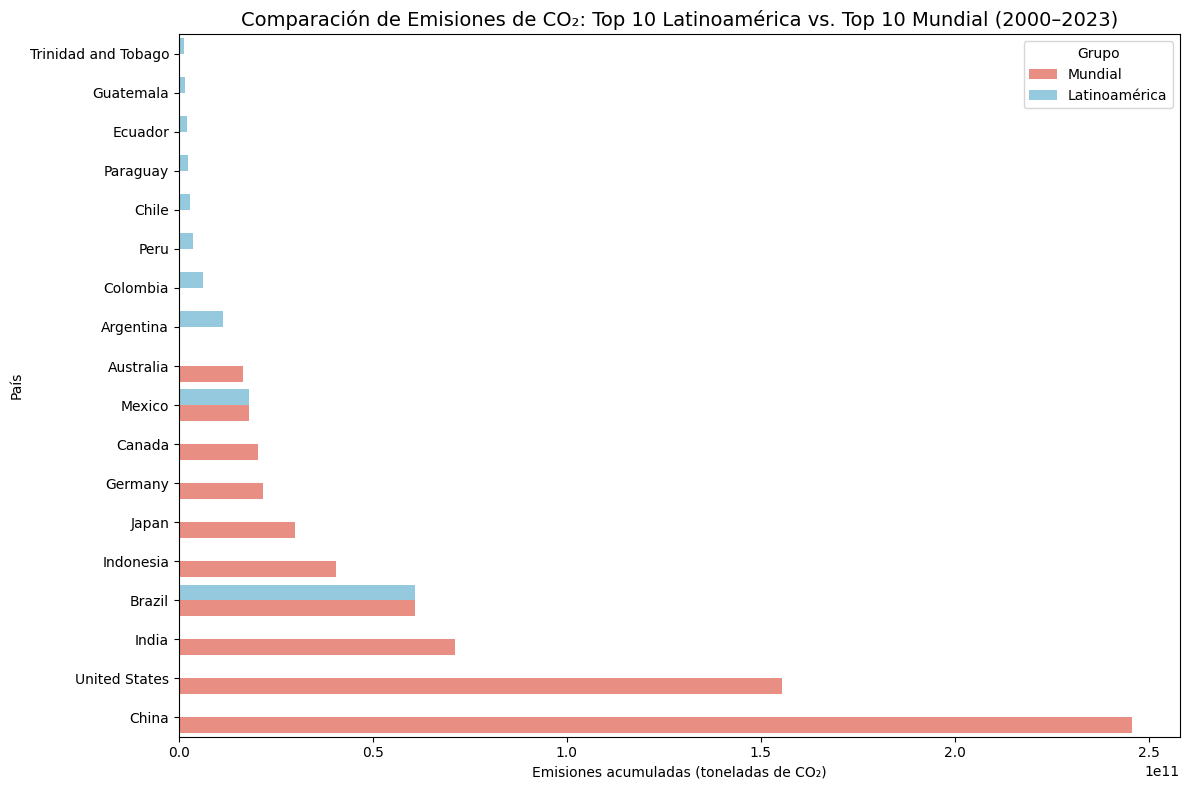

In [32]:
# Concatenar los DataFrames
df_comparacion = pd.concat([df_top_latin_america, df_top_greenhouse], ignore_index=True)
df_comparacion_ordenado = df_comparacion.sort_values(by='Emisiones', ascending=False)

print("DataFrame de Comparación (ordenado para el gráfico):")
print(df_comparacion_ordenado)
print("\n")

# --- Crear el gráfico de barras con seaborn ---
plt.figure(figsize=(12, 8))
sns.barplot(x='Emisiones', y='Pais', hue='Grupo', data=df_comparacion_ordenado, palette={'Latinoamérica': 'skyblue', 'Mundial': 'salmon'})

# Añadir etiquetas y título
plt.xlabel('Emisiones acumuladas (toneladas de CO₂)')
plt.ylabel('País')
plt.title('Comparación de Emisiones de CO₂: Top 10 Latinoamérica vs. Top 10 Mundial (2000–2023)', fontsize=14)
plt.legend(title='Grupo')

# Invertir el eje Y para mostrar los mayores emisores arriba
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# **Continuación...**

In [ ]:
## blablabla